In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [3]:
#income per state
income_data = pd.read_csv("resources/income.csv")
income_data.head()

,State,"Total, all households",Mean income
0,Alabama,1821210,57655
1,Alaska,248248,82091
2,Arizona,2326468,67436
3,Arkansas,1117154,53253
4,California,12392852,83483


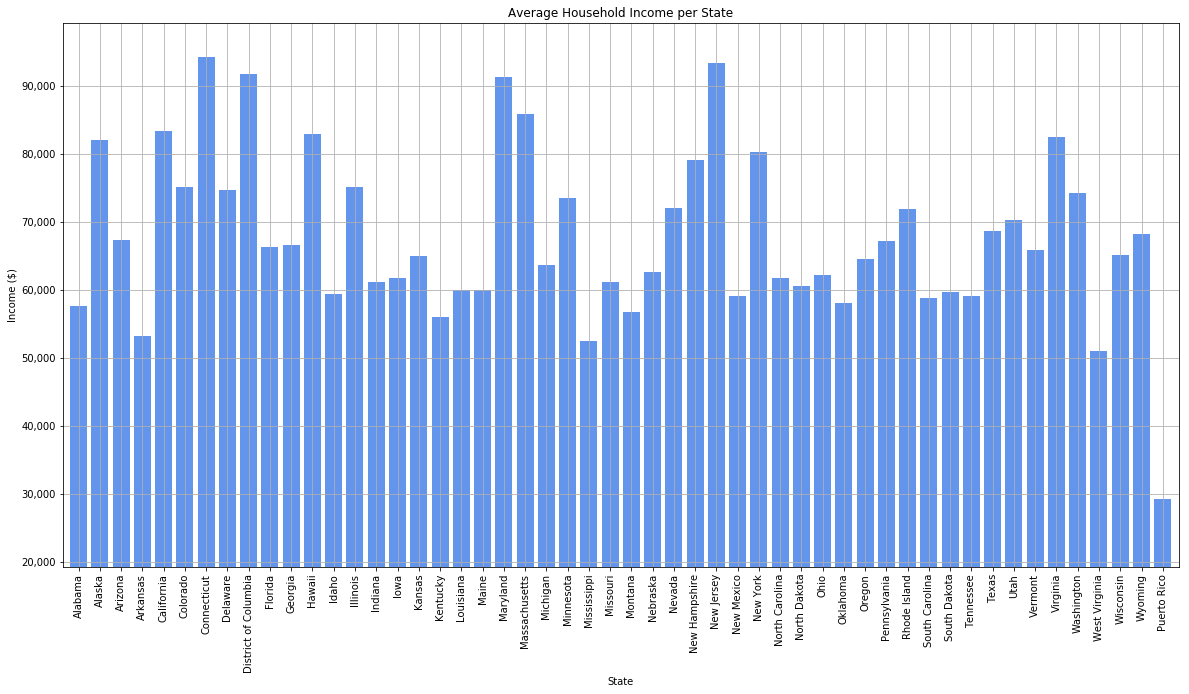

In [100]:
#average household income per state bar graph
plt.bar(income_data["State"], income_data["Mean income"], color="cornflowerblue")
plt.title("Average Household Income per State")
tick_locations = [value for value in income_data["State"]]
plt.xticks(tick_locations, fontsize=10, rotation=90)
plt.ylim(min(income_data["Mean income"])-10000, max(income_data["Mean income"]+5000))
plt.xlabel("State")
plt.ylabel("Income ($)")
plt.grid()
plt.xlim(-0.75, len(income_data["State"])-0.25)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

#current fig size is 6.0 x 4.0
fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 20
fig_size[1] = 10

plt.savefig("IncomePerState.png", edgecolor="black", frameon=True)

In [5]:
#dataframe for population/age/sex/race
demo_data = pd.read_csv("resources/sexagerace2013-2017.csv")
demo_data["Total population"] = pd.to_numeric(demo_data["Total population"])
demo_data.head()

,State,Total population,Male Percent,Female Percent,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,...,21 years and over,62 years and over,65 years and over,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other Race,Total population - Hispanic or Latino (of any race)
0,Alabama,4850771,48.5,51.5,6.0,6.3,6.5,6.7,7.0,12.9,...,73.1,19.4,15.7,68.4,26.5,0.5,1.3,0.0,1.4,4.1
1,Alaska,738565,52.3,47.7,7.3,7.0,6.8,6.5,7.9,16.0,...,70.8,13.3,10.1,65.3,3.2,14.2,6.2,1.2,1.4,6.8
2,Arizona,6809946,49.7,50.3,6.4,6.7,6.7,6.8,7.1,13.5,...,71.9,19.7,16.2,77.5,4.3,4.4,3.1,0.2,7.0,30.9
3,Arkansas,2977944,49.1,50.9,6.4,6.7,6.6,6.7,6.9,13.0,...,72.1,19.5,16.0,77.3,15.4,0.7,1.4,0.2,2.5,7.2
4,California,38982847,49.7,50.3,6.4,6.5,6.5,6.7,7.3,14.9,...,72.4,16.4,13.2,60.6,5.8,0.7,14.1,0.4,13.7,38.8


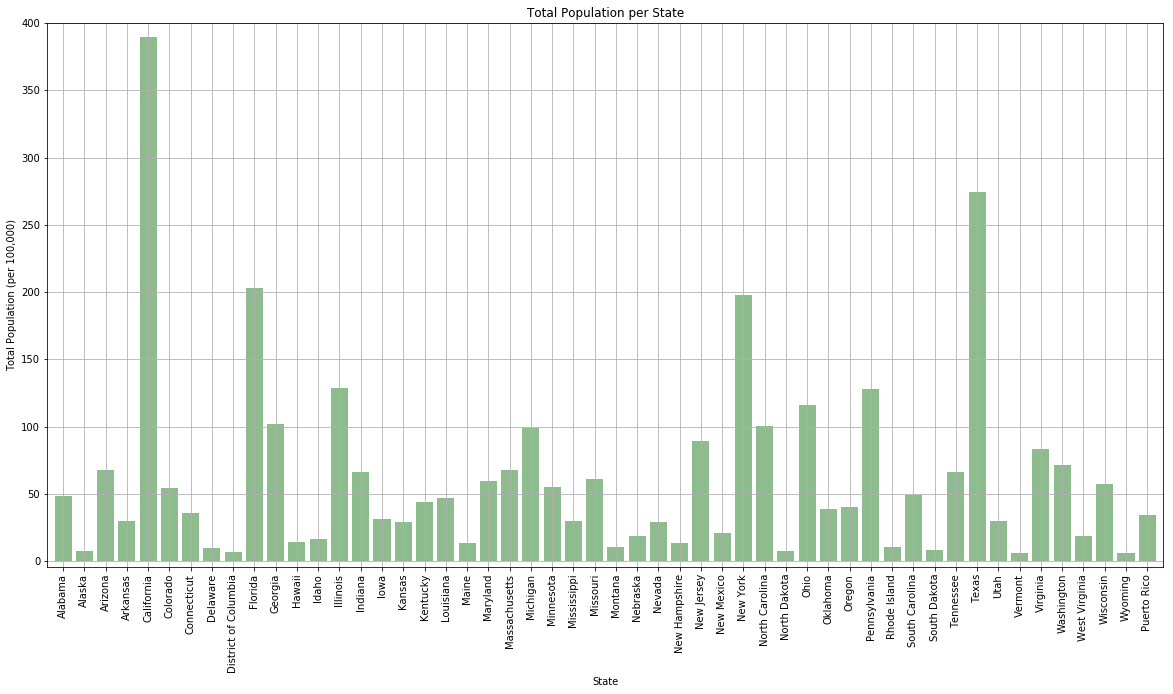

In [101]:
#population per state bar graph
plt.bar(demo_data["State"], demo_data["Total population"]/100000, color="darkseagreen")
plt.ylim(min((demo_data["Total population"]/100000)-10), max((demo_data["Total population"])/100000)+10)
plt.xticks(rotation=90)
plt.grid()
plt.title("Total Population per State")
plt.xlim(-0.75, len(demo_data["State"])-0.25)
plt.xlabel("State")
plt.ylabel("Total Population (per 100,000)")

plt.savefig("PopulationPerState.png")

plt.show()

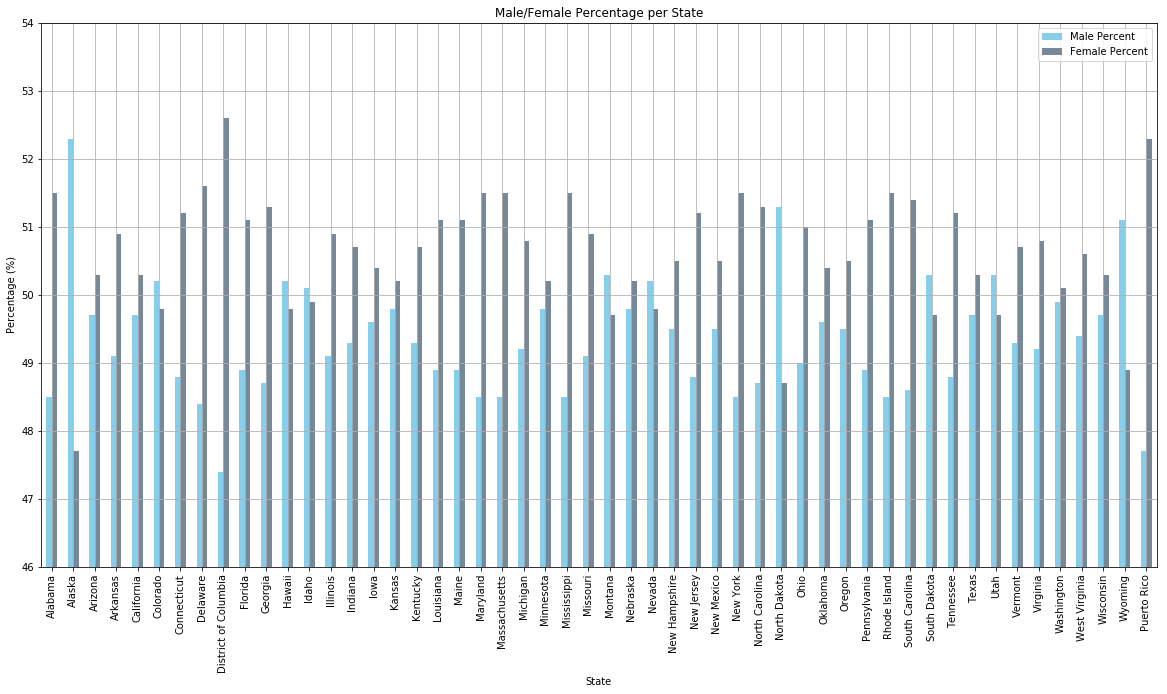

In [104]:
#male/female bar graph
demo_data.plot.bar(x = "State", y = ["Male Percent", "Female Percent"], rot = 90, color=["skyblue", "lightslategrey"])
plt.title("Male/Female Percentage per State")
plt.ylabel("Percentage (%)")
plt.ylim(46, 54)
plt.grid()

plt.savefig("MaleFemalePerState.png")

plt.show()

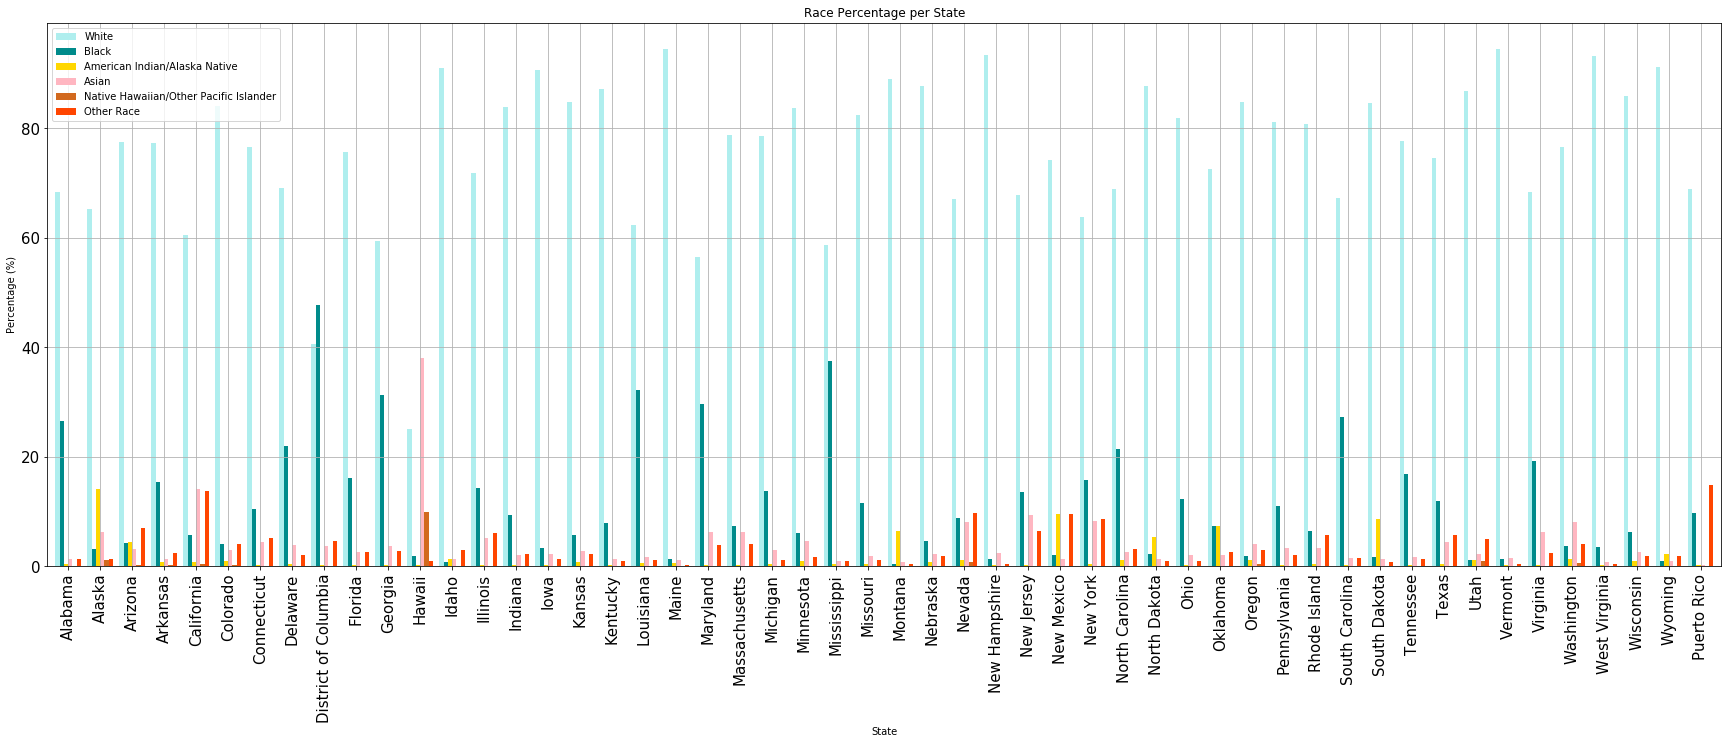

In [109]:
#race per state
color=["paleturquoise", "darkcyan", "gold", "lightpink", "chocolate", "orangered"]

demo_data.plot.bar(x = "State", y = ["White", "Black", "American Indian/Alaska Native", "Asian", "Native Hawaiian/Other Pacific Islander", "Other Race"], 
                   rot = 90,
                  width=.8,
                  fontsize=15,
                  color=color)
plt.title("Race Percentage per State")
plt.ylabel("Percentage (%)")

fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 30
fig_size[1] = 10

plt.grid()
#plt.tight_layout()

plt.savefig("RacePerState.png")

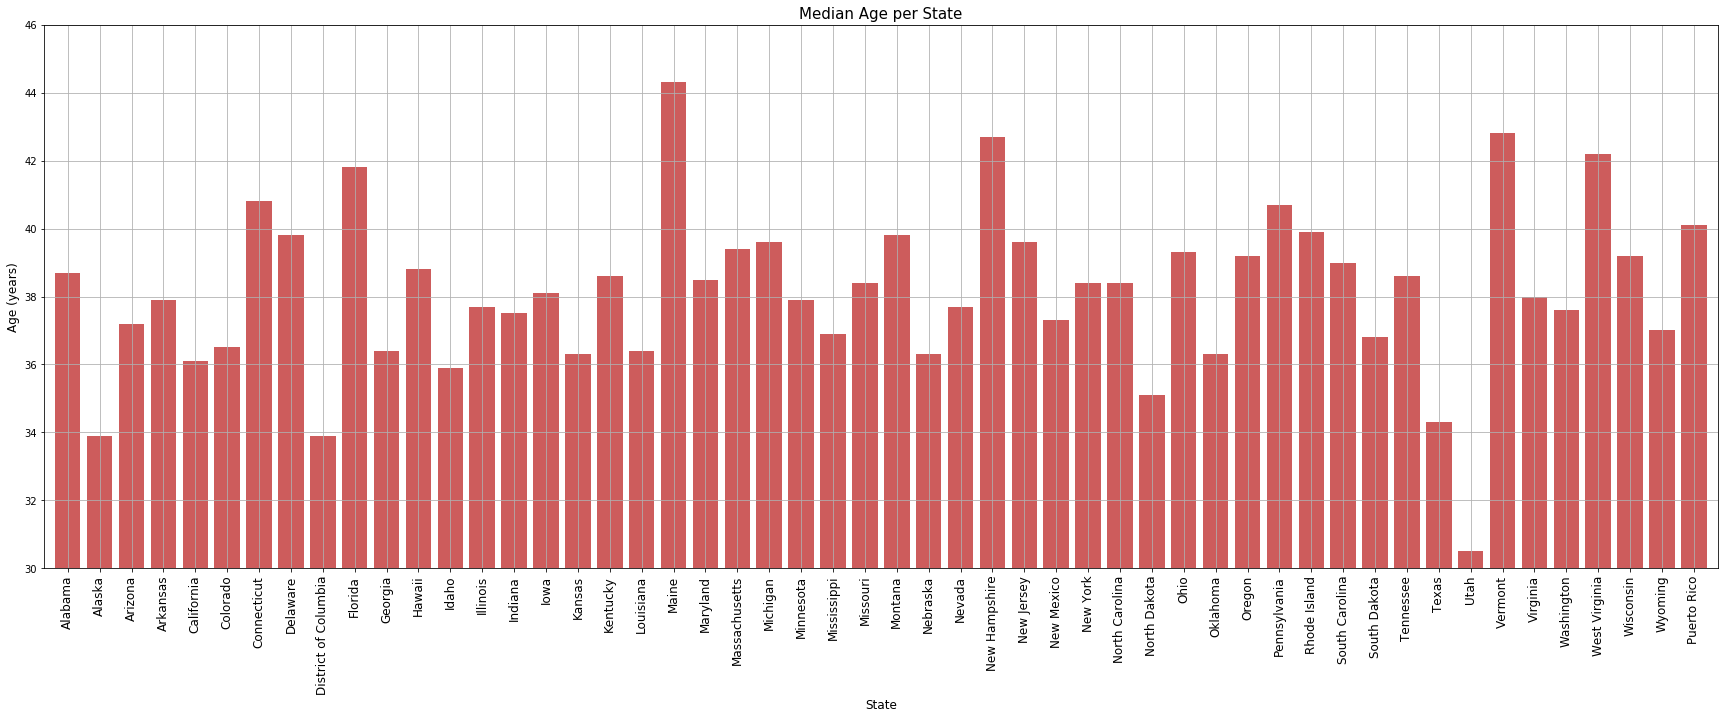

In [110]:
#median age per state
plt.bar(demo_data["State"], demo_data["Median age (years)"], color="indianred")
plt.title("Median Age per State", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("State", fontsize=12)
plt.ylabel("Age (years)", fontsize=12)
plt.ylim(30, 46)
plt.xlim(-0.75, len(demo_data["State"])-0.25)

fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 30
fig_size[1] = 20

plt.grid()

plt.savefig("AgePerState.png")

plt.show()

In [111]:
#dataframe to group states by region
regions_df = pd.read_csv("resources/state_census_codes.csv")
del regions_df["STFIPS "]
regions_df.head()

,State,Region
0,Alabama,South
1,Alaska,West
2,Arizona,West
3,Arkansas,South
4,California,West


In [11]:
#merge regions dataframe and income dataframe
by_region = pd.merge(income_data, regions_df, on="State")
by_region.head()

,State,"Total, all households",Mean income,Region
0,Alabama,1821210,57655,South
1,Alaska,248248,82091,West
2,Arizona,2326468,67436,West
3,Arkansas,1117154,53253,South
4,California,12392852,83483,West


In [12]:
#mean income per region
region_income = by_region.groupby("Region").mean()['Mean income']
region_income
income_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
             "Mean Income":[64353, 77588, 65333, 70687]})
income_df

,Region,Mean Income
0,Midwest,64353
1,Northeast,77588
2,South,65333
3,West,70687


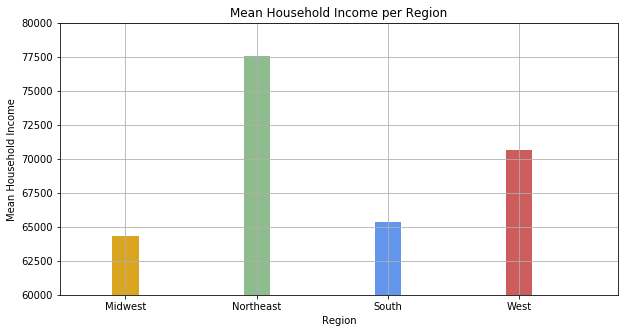

In [113]:
#mean income per region bar graph
plt.bar(income_df["Region"], income_df["Mean Income"], width=.2, color=["goldenrod", "darkseagreen", "cornflowerblue", "indianred"])
plt.title("Mean Household Income per Region", fontsize=12)
plt.xlabel("Region", fontsize=10)
plt.ylabel("Mean Household Income", fontsize=10)
plt.xticks(fontsize=10)
plt.xlim(-0.5, len(income_df["Region"])-0.25)
plt.ylim(60000, 80000)
plt.grid()

fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 10
fig_size[1] = 5

plt.savefig("IncomePerRegion.png")

plt.show()


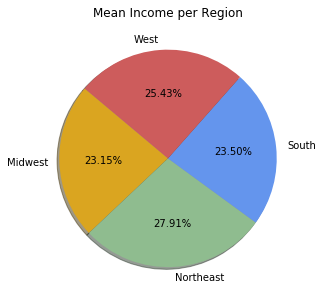

In [117]:
#mean income per region pie graph
sizes = income_df["Mean Income"]
labels = income_df["Region"]
colors = ["goldenrod", "darkseagreen", "cornflowerblue", "indianred"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("Mean Income per Region")

plt.savefig("IncomePerRegionPie.png")

plt.show()

In [118]:
#merge region dataframe with demographics dataframe
demo_region = pd.merge(demo_data, regions_df, on="State")
demo_region.head()

,State,Total population,Male Percent,Female Percent,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,...,62 years and over,65 years and over,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other Race,Total population - Hispanic or Latino (of any race),Region
0,Alabama,4850771,48.5,51.5,6.0,6.3,6.5,6.7,7.0,12.9,...,19.4,15.7,68.4,26.5,0.5,1.3,0.0,1.4,4.1,South
1,Alaska,738565,52.3,47.7,7.3,7.0,6.8,6.5,7.9,16.0,...,13.3,10.1,65.3,3.2,14.2,6.2,1.2,1.4,6.8,West
2,Arizona,6809946,49.7,50.3,6.4,6.7,6.7,6.8,7.1,13.5,...,19.7,16.2,77.5,4.3,4.4,3.1,0.2,7.0,30.9,West
3,Arkansas,2977944,49.1,50.9,6.4,6.7,6.6,6.7,6.9,13.0,...,19.5,16.0,77.3,15.4,0.7,1.4,0.2,2.5,7.2,South
4,California,38982847,49.7,50.3,6.4,6.5,6.5,6.7,7.3,14.9,...,16.4,13.2,60.6,5.8,0.7,14.1,0.4,13.7,38.8,West


In [119]:
#total population by region dataframe
region_pop = demo_region.groupby("Region").sum()["Total population"]
region_pop
pop_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
        "Total Population":[67850273, 56275471, 121057103, 75238360]
})

pop_df

,Region,Total Population
0,Midwest,67850273
1,Northeast,56275471
2,South,121057103
3,West,75238360


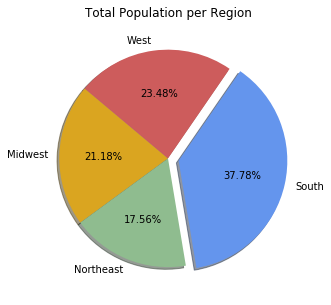

In [120]:
#total population by region pie graph
sizes = pop_df["Total Population"]
labels = pop_df["Region"]
colors = ["goldenrod", "darkseagreen", "cornflowerblue", "indianred"]
explode = [0, 0, 0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("Total Population per Region")

plt.savefig("PopulationPerRegionPie.png")

plt.show()

In [121]:
#race breakdown per region
#white
white_region = demo_region.groupby("Region").mean()["White"]
white_region_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
    "White Percent":[83.68, 81.31, 69.34, 73.53]})
#black
black_region = demo_region.groupby("Region").mean()["Black"]
black_region_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
    "Black Percent":[7.63, 7.63, 22.00, 3.15]
})

#american indian/alaska native
native_region = demo_region.groupby("Region").mean()["American Indian/Alaska Native"]
native_region_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
    "American Indian/Alaska Native Percent":[1.61, 0.32, 0.84, 3.53]
})

#asian
asian_region = demo_region.groupby("Region").mean()["Asian"]
asian_region_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
    "Asian":[2.63, 4.47, 2.74, 7.54]
})

#Native Hawaiian/Other Pacific Islander
islander_region = demo_region.groupby("Region").mean()["Native Hawaiian/Other Pacific Islander"]
islander_region_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
    "Native Hawaiian/Other Pacific Islander":[0.03, 0.01, 0.06, 1.24]
})

#other race
otherrace_region = demo_region.groupby("Region").mean()["Other Race"]
otherrace_region_df = pd.DataFrame({"Region":["Midwest", "Northeast", "South", "West"],
    "Other Race":[1.85, 3.68, 2.35, 5.16]
})

In [122]:
#merge all races into one dataframe
merge1 = pd.merge(white_region_df, black_region_df, on="Region")
merge2 = pd.merge(merge1, native_region_df, on="Region")
merge3 = pd.merge(merge2, asian_region_df, on="Region")
merge4 = pd.merge(merge3, islander_region_df, on="Region")
races_region = pd.merge(merge4, otherrace_region_df, on="Region")
races_region = races_region.rename(columns={"White Percent":"White", "Black Percent":"Black", 
    "American Indian/Alaska Native Percent":"Native", "Native Hawaiian/Other Pacific Islander":"Islander", "Other Race":"Other"})
races_region

,Region,White,Black,Native,Asian,Islander,Other
0,Midwest,83.68,7.63,1.61,2.63,0.03,1.85
1,Northeast,81.31,7.63,0.32,4.47,0.01,3.68
2,South,69.34,22.00,0.84,2.74,0.06,2.35
3,West,73.53,3.15,3.53,7.54,1.24,5.16


In [51]:
#separate race dataframe into separate races to be able to put in graph
#midwest
mw_races = pd.DataFrame({"Race":["White", "Black", "Native", "Asian", "Islander", "Other"],
    "Percentage":[83.68, 7.63, 1.61, 2.63, 0.03, 1.85]})

#northeast
ne_races = pd.DataFrame({"Race":["White", "Black", "Native", "Asian", "Islander", "Other"],
    "Percentage":[81.31, 7.63, 0.32, 4.47, 0.01, 3.68]})

#south
s_races = pd.DataFrame({"Race":["White", "Black", "Native", "Asian", "Islander", "Other"],
    "Percentage":[69.34, 22.00, 0.84, 2.74, 0.06, 2.34]})

#west
w_races = pd.DataFrame({"Race":["White", "Black", "Native", "Asian", "Islander", "Other"],
    "Percentage":[73.53, 3.15, 3.53, 7.54, 1.24, 5.16]})

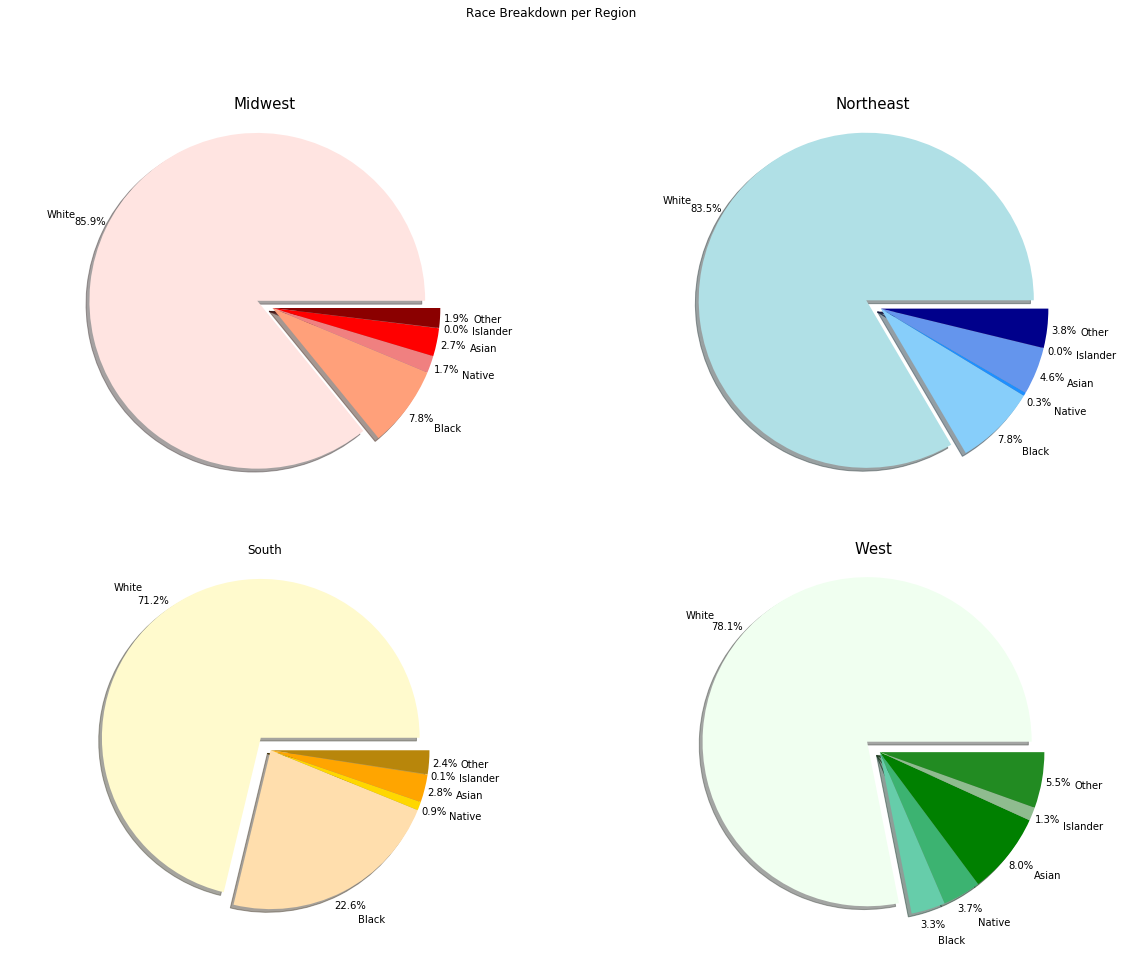

In [125]:
#race per region pie chart
explode = [0.1, 0, 0, 0, 0, 0]

mw_colors = ["mistyrose", "lightsalmon", "lightcoral", "red", "indianred", "darkred"]
ne_colors = ["powderblue", "lightskyblue", "dodgerblue", "cornflowerblue", "slateblue", "darkblue"]
s_colors = ["lemonchiffon", "navajowhite", "gold", "orange", "goldenrod", "darkgoldenrod"]
w_colors = ["honeydew", "mediumaquamarine", "mediumseagreen", "g", "darkseagreen", "forestgreen"]

plt.subplot(221)
plt.pie(mw_races["Percentage"], colors=mw_colors, explode=explode, labels=mw_races["Race"], autopct="%1.1f%%", shadow=True,
       pctdistance=1.1, labeldistance=1.2)
plt.axis("equal")
plt.title("Midwest", fontsize=15)

plt.subplot(222)
plt.pie(ne_races["Percentage"], colors=ne_colors, explode=explode, labels=mw_races["Race"], autopct="%1.1f%%", shadow=True,
       pctdistance=1.1, labeldistance=1.2)
plt.axis("equal")
plt.title("Northeast", fontsize=15)

plt.subplot(223)
plt.pie(s_races["Percentage"], colors=s_colors, explode=explode, labels=mw_races["Race"], autopct="%1.1f%%", shadow=True,
       pctdistance=1.1, labeldistance=1.2)
plt.axis("equal")
plt.title("South")

plt.subplot(224)
plt.pie(w_races["Percentage"], colors=w_colors, explode=explode, labels=mw_races["Race"], autopct="%1.1f%%", shadow=True,
       pctdistance=1.1, labeldistance=1.2)
plt.axis("equal")
plt.title("West", fontsize=15)

plt.suptitle("Race Breakdown per Region")

fig_size = plt.rcParams["figure.figsize"]
fig_size

fig_size[0] = 20
fig_size[1] = 15
fig_size = plt.rcParams["figure.figsize"]

plt.savefig("RacePerRegion.png")

plt.show()